### Name - Tanya Malhotra
### Roll No. - R177219191
### SAP Id - 500075815
### Batch - AIML (B6)

In [117]:
### importing the required libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [2]:
### importing the dataset
df = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")

## Exploratory Data Analysis

In [3]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
df.select_dtypes(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
import pandas_profiling as pp

In [ ]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/94 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Cleaning

In [10]:
missing_vals = 100*(df.isnull().sum()/len(df))
missing_vals = missing_vals[missing_vals > 0].sort_values(ascending=False).round(2) 
missing_table = pd.DataFrame(missing_vals)
missing_table = missing_table.rename(columns={0: "Percentage of missing values column wise"})
missing_table

,Percentage of missing values column wise
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageType,5.55
GarageYrBlt,5.55
GarageFinish,5.55
GarageQual,5.55


In [11]:
missing_val = (df.isnull().sum()/len(df) * 100).round(2)
print(missing_val, '%')

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64 %


In [12]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [13]:
### Viewing missing values percentage without using pandas profile report
#missing_val = (df['LotFrontage'].isnull().sum()/len(df['LotFrontage'])*100).round(2)
#print(missing_val, '%') 

#### Filling null values

In [14]:
df['LotFrontage'] = df['LotFrontage'].fillna(70)

In [15]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [16]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')

In [17]:
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [18]:
df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [19]:
df['BsmtQual'] = df['BsmtQual'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('None')

In [20]:
df['BsmtExposure'].unique()
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')
df['Electrical'] = df['Electrical'].fillna('SBrkr')
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
df['GarageType'] = df['GarageType'].fillna('None')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(method = 'bfill')
df['GarageFinish'] = df['GarageFinish'].fillna('None')
df['GarageQual'] = df['GarageQual'].fillna('None')
df['GarageCond'] = df['GarageCond'].fillna('None')

In [21]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

### Visualizing the attributes with too many missing values

In [22]:
import seaborn as sns

<AxesSubplot:xlabel='Alley', ylabel='SalePrice'>

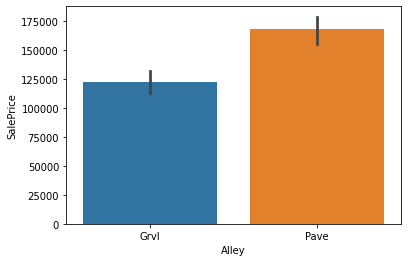

In [23]:
sns.barplot(x="Alley", y="SalePrice", data=df)

In [24]:
df['Alley'] = df['Alley'].fillna('None')

<AxesSubplot:xlabel='Alley', ylabel='SalePrice'>

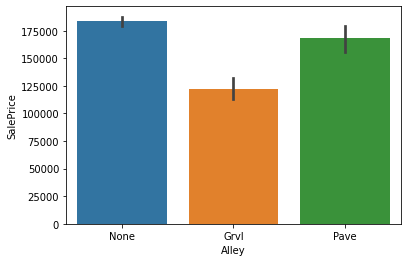

In [25]:
sns.barplot(x="Alley", y="SalePrice", data=df)

<AxesSubplot:xlabel='PoolQC', ylabel='SalePrice'>

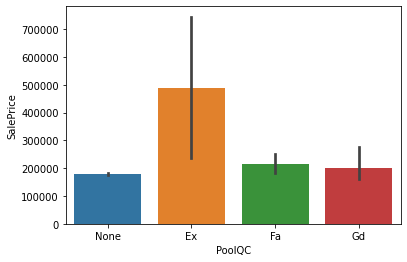

In [26]:
df['PoolQC'] = df['PoolQC'].fillna('None')
sns.barplot(x = "PoolQC", y = "SalePrice", data = df)

<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

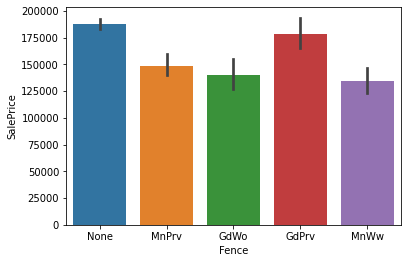

In [27]:
df['Fence'] = df['Fence'].fillna('None')
sns.barplot(x = "Fence", y = "SalePrice", data = df)

In [28]:
df = df.drop(columns = "MiscFeature")

### Co-relation Matrix

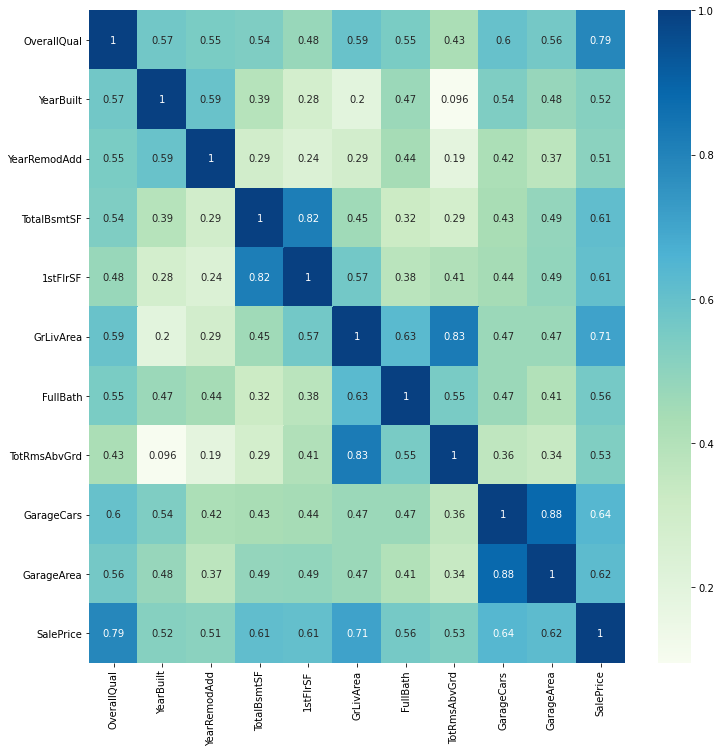

In [29]:
import matplotlib.pyplot as plt
#Calculating Correlation 
correlation=df.corr()
positive_correlation = correlation.index[abs(correlation["SalePrice"])>0.5]

#Plotting the Correlation in HeatMap for the data columns which has correlation value more than 0.5
plt.figure(figsize=(12,12))
corr_Heatmap=sns.heatmap(df[positive_correlation].corr(),annot=True,cmap="GnBu")

In [30]:
target = abs(correlation["SalePrice"]).sort_values(ascending = False).round(2)
print(target)

SalePrice        1.00
OverallQual      0.79
GrLivArea        0.71
GarageCars       0.64
GarageArea       0.62
TotalBsmtSF      0.61
1stFlrSF         0.61
FullBath         0.56
TotRmsAbvGrd     0.53
YearBuilt        0.52
YearRemodAdd     0.51
MasVnrArea       0.47
Fireplaces       0.47
GarageYrBlt      0.46
BsmtFinSF1       0.39
LotFrontage      0.33
WoodDeckSF       0.32
2ndFlrSF         0.32
OpenPorchSF      0.32
HalfBath         0.28
LotArea          0.26
BsmtFullBath     0.23
BsmtUnfSF        0.21
BedroomAbvGr     0.17
KitchenAbvGr     0.14
EnclosedPorch    0.13
ScreenPorch      0.11
PoolArea         0.09
MSSubClass       0.08
OverallCond      0.08
MoSold           0.05
3SsnPorch        0.04
YrSold           0.03
LowQualFinSF     0.03
Id               0.02
MiscVal          0.02
BsmtHalfBath     0.02
BsmtFinSF2       0.01
Name: SalePrice, dtype: float64


## Drawing scatterplots to visualise co-relation between attributes and target variable

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

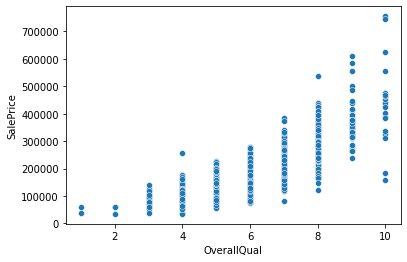

In [31]:
sns.scatterplot(df['OverallQual'], df['SalePrice'])

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

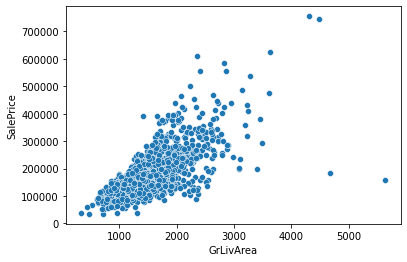

In [32]:
sns.scatterplot(df['GrLivArea'], df['SalePrice'])

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

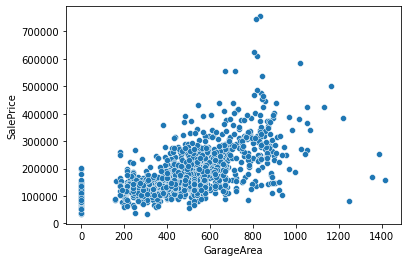

In [33]:
sns.scatterplot(df['GarageArea'], df['SalePrice'])

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

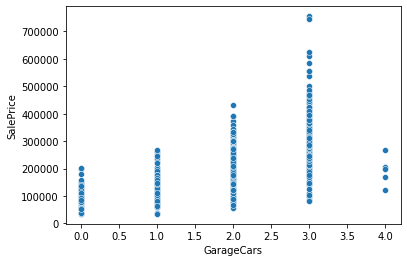

In [34]:
sns.scatterplot(df['GarageCars'], df['SalePrice'])

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

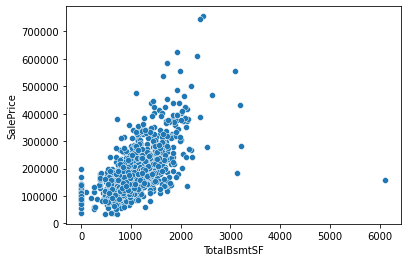

In [35]:
sns.scatterplot(df['TotalBsmtSF'], df['SalePrice'])

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

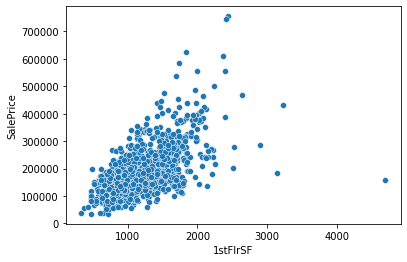

In [36]:
sns.scatterplot(df['1stFlrSF'], df['SalePrice'])

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

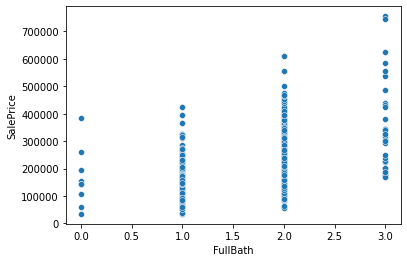

In [37]:
sns.scatterplot(df['FullBath'], df['SalePrice'])

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

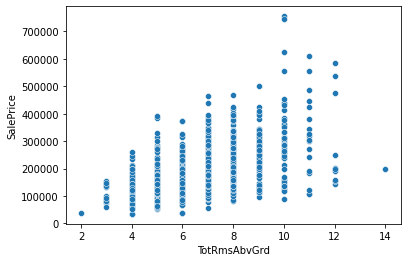

In [38]:
sns.scatterplot(df['TotRmsAbvGrd'], df['SalePrice'])

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

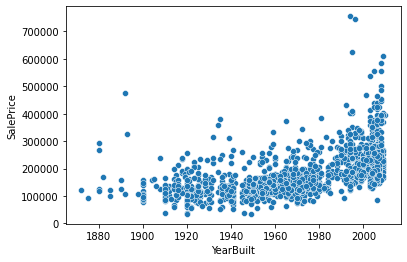

In [39]:
sns.scatterplot(df['YearBuilt'], df['SalePrice'])

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

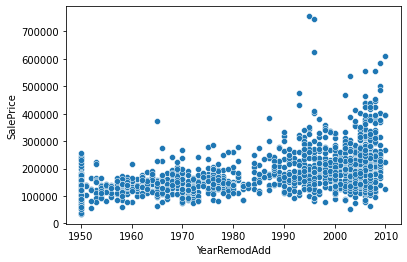

In [40]:
sns.scatterplot(df['YearRemodAdd'], df['SalePrice'])

## Outlier Analysis

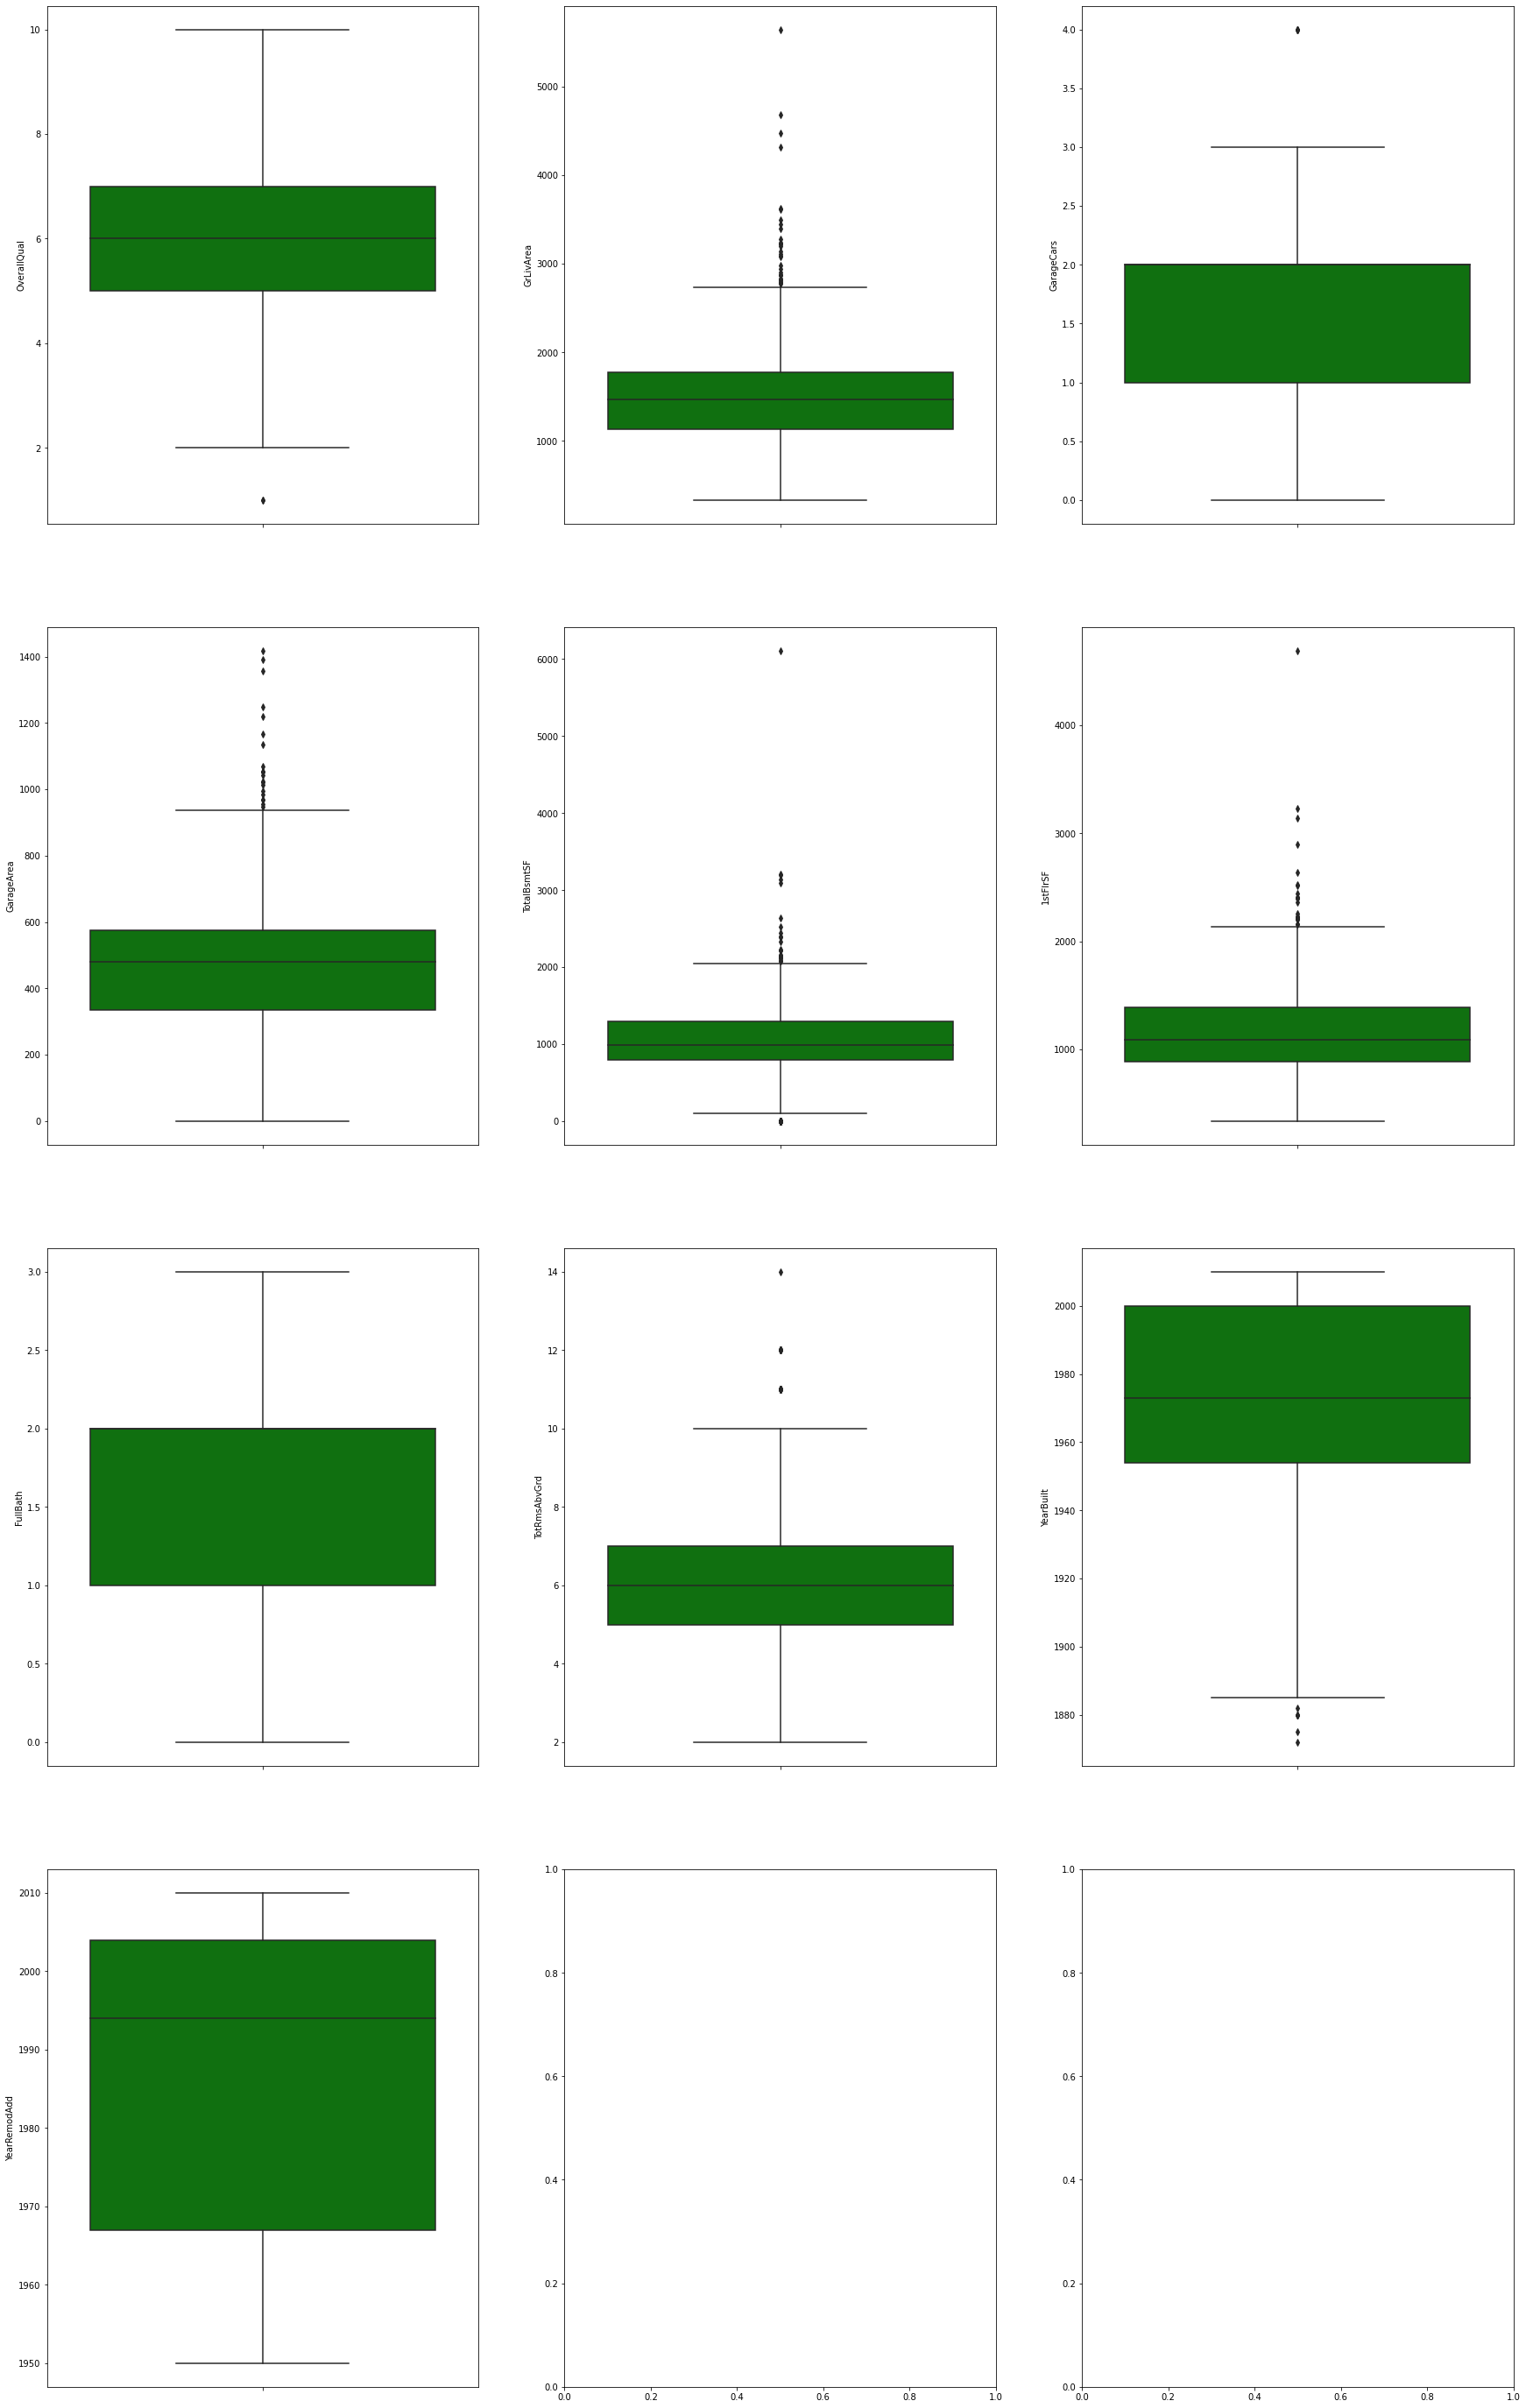

In [41]:
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd'] 
fig,ax = plt.subplots(ncols=3,nrows=4,figsize=(30,50))
index=0
ax=ax.flatten()

for i in enumerate(cols):
        sns.boxplot(y=i[1],data=df,ax=ax[index], color = 'green')
        index = index + 1

### Removing Outliers

<AxesSubplot:>

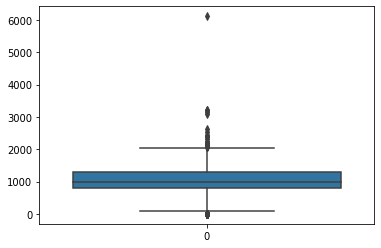

In [42]:
sns.boxplot(data = df['TotalBsmtSF'])

In [43]:
lower = df['TotalBsmtSF'].mean()-3*df['TotalBsmtSF'].std()
upper = df['TotalBsmtSF'].mean()+3*df['TotalBsmtSF'].std()
df = df[(df['TotalBsmtSF']>lower) & (df['TotalBsmtSF']<upper)]

<AxesSubplot:>

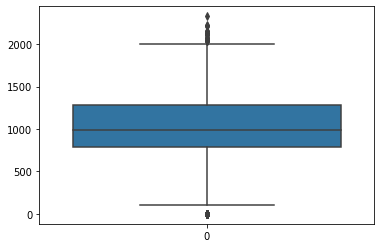

In [44]:
sns.boxplot(data = df['TotalBsmtSF'])

<AxesSubplot:>

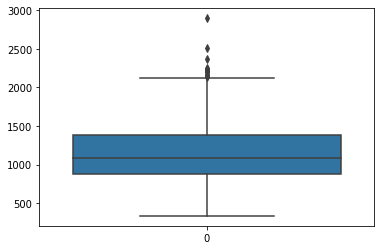

In [45]:
sns.boxplot(data = df['1stFlrSF'])

In [46]:
lower = df['1stFlrSF'].mean()-3*df['1stFlrSF'].std()
upper = df['1stFlrSF'].mean()+3*df['1stFlrSF'].std()
df = df[(df['1stFlrSF']>lower) & (df['1stFlrSF']<upper)]

<AxesSubplot:>

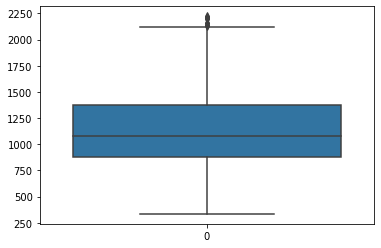

In [47]:
sns.boxplot(data = df['1stFlrSF'])

In [48]:
df.skew(axis = 0)

Id               -0.002542
MSSubClass        1.398411
LotFrontage       1.697737
LotArea          12.640429
OverallQual       0.158136
OverallCond       0.689379
YearBuilt        -0.605311
YearRemodAdd     -0.496825
MasVnrArea        2.686882
BsmtFinSF1        0.707254
BsmtFinSF2        4.336485
BsmtUnfSF         0.900438
TotalBsmtSF       0.153428
1stFlrSF          0.610190
2ndFlrSF          0.766226
LowQualFinSF      8.963333
GrLivArea         0.835848
BsmtFullBath      0.609241
BsmtHalfBath      4.110716
FullBath          0.015390
HalfBath          0.681731
BedroomAbvGr      0.219888
KitchenAbvGr      4.502159
TotRmsAbvGrd      0.668961
Fireplaces        0.640849
GarageYrBlt      -0.616147
GarageCars       -0.343409
GarageArea        0.118067
WoodDeckSF        1.559227
OpenPorchSF       2.354172
EnclosedPorch     3.129487
3SsnPorch        10.249950
ScreenPorch       4.121498
PoolArea         17.455785
MiscVal          24.351196
MoSold            0.215145
YrSold            0.096625
S

### Visualizing attributes with less co-relation

<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

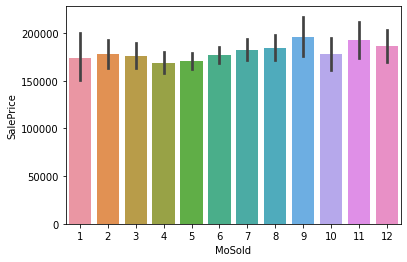

In [49]:
sns.barplot(x="MoSold", y="SalePrice", data=df)

<AxesSubplot:xlabel='3SsnPorch', ylabel='SalePrice'>

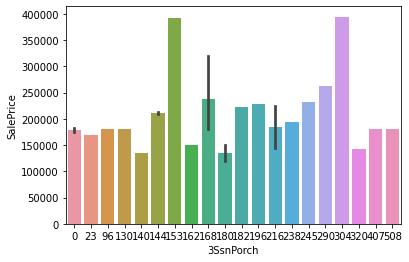

In [50]:
sns.barplot(x="3SsnPorch", y="SalePrice", data=df)

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

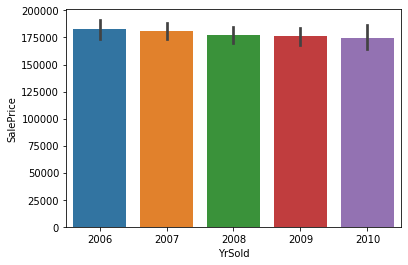

In [51]:
sns.barplot(x="YrSold", y="SalePrice", data=df)

<AxesSubplot:xlabel='LowQualFinSF', ylabel='SalePrice'>

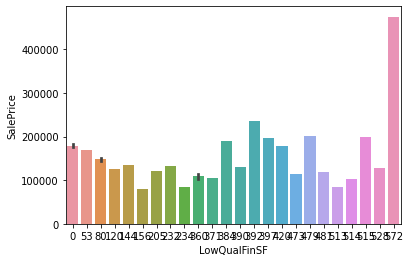

In [52]:
sns.barplot(x="LowQualFinSF", y="SalePrice", data=df) 

<AxesSubplot:xlabel='MiscVal', ylabel='SalePrice'>

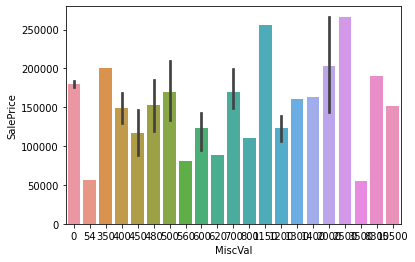

In [53]:
sns.barplot(x="MiscVal", y="SalePrice", data=df) 

<AxesSubplot:xlabel='BsmtHalfBath', ylabel='SalePrice'>

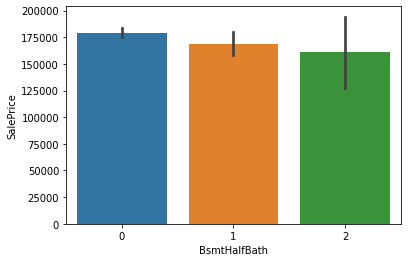

In [54]:
sns.barplot(x="BsmtHalfBath", y="SalePrice", data=df) 

<BarContainer object of 1445 artists>

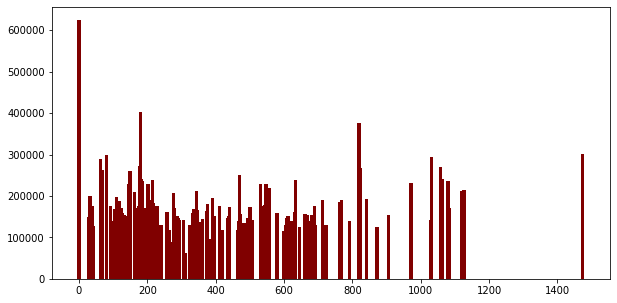

In [55]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(df['BsmtFinSF2'], df['SalePrice'], color ='maroon',
        width = 10)

<AxesSubplot:xlabel='PoolArea', ylabel='SalePrice'>

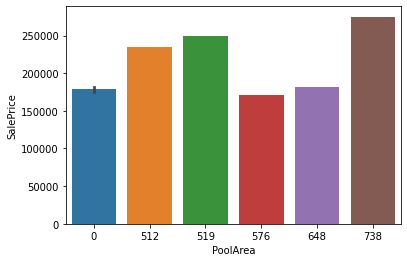

In [56]:
sns.barplot(x="PoolArea", y="SalePrice", data=df) 

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

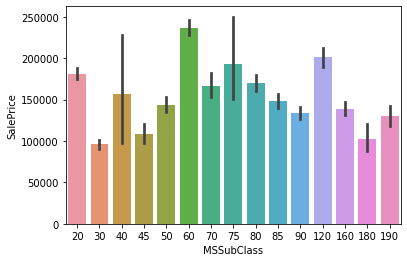

In [57]:
sns.barplot(x="MSSubClass", y="SalePrice", data=df) 

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

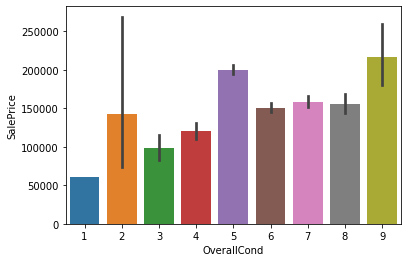

In [58]:
sns.barplot(x="OverallCond", y="SalePrice", data=df) 

### Checking for skewness

<AxesSubplot:xlabel='MiscVal', ylabel='Density'>

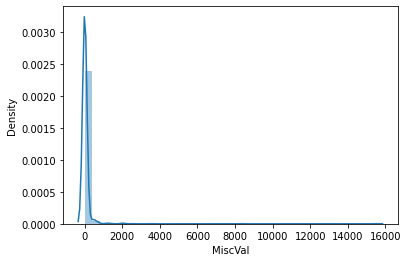

In [59]:
sns.distplot(df['MiscVal'])

<AxesSubplot:xlabel='LotArea', ylabel='Density'>

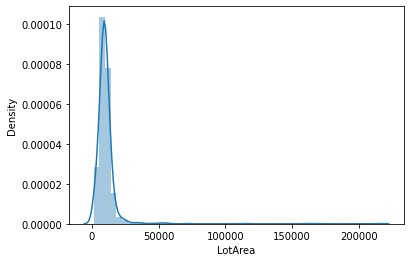

In [60]:
sns.distplot(df['LotArea'])

<AxesSubplot:xlabel='3SsnPorch', ylabel='Density'>

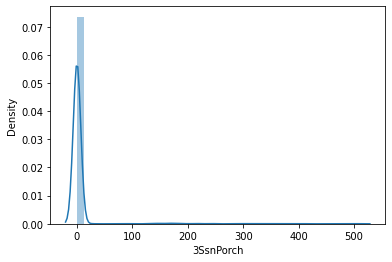

In [61]:
sns.distplot(df['3SsnPorch'])

<AxesSubplot:xlabel='PoolArea', ylabel='Density'>

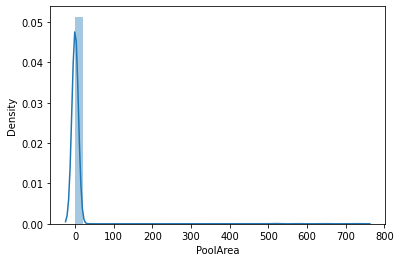

In [62]:
sns.distplot(df['PoolArea'])

## Fixing Skewness

In [63]:
df['LotArea'] = np.log(1+df['LotArea'])
df['3SsnPorch'] = np.log(1+df['3SsnPorch'])
df['PoolArea'] = np.log(1+df['PoolArea'])
df['MiscVal'] = np.log(1+df['MiscVal'])

<AxesSubplot:xlabel='LotArea', ylabel='Density'>

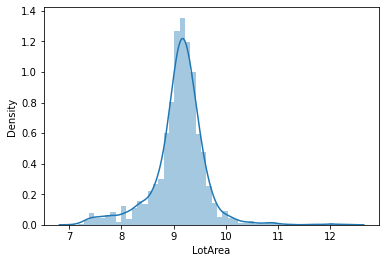

In [64]:
sns.distplot(df['LotArea'])

<AxesSubplot:xlabel='3SsnPorch', ylabel='Density'>

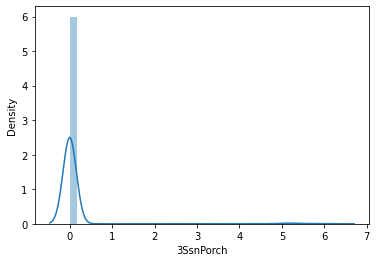

In [65]:
sns.distplot(df['3SsnPorch'])

<AxesSubplot:xlabel='PoolArea', ylabel='Density'>

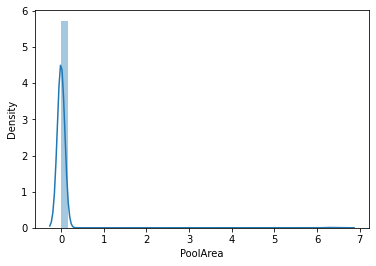

In [66]:
sns.distplot(df['PoolArea'])

<AxesSubplot:xlabel='MiscVal', ylabel='Density'>

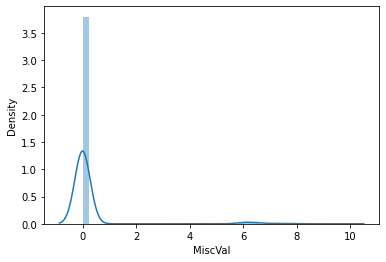

In [67]:
sns.distplot(df['MiscVal'])

In [68]:
print(df['LotArea'].skew())
print(df['PoolArea'].skew())
print(df['3SsnPorch'].skew())
print(df['MiscVal'].skew())

-0.1784560391073098
16.941307129126884
7.6932350966597
5.14119811380195


In [69]:
df.select_dtypes(include="object")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,None,Attchd,RFn,TA,TA,Y,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Attchd,RFn,TA,TA,Y,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,Attchd,RFn,TA,TA,Y,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,Detchd,Unf,TA,TA,Y,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,TA,Attchd,RFn,TA,TA,Y,None,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Attchd,RFn,TA,TA,Y,None,None,WD,Normal
1456,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,TA,Attchd,Unf,TA,TA,Y,None,MnPrv,WD,Normal
1457,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Gd,Attchd,RFn,TA,TA,Y,None,GdPrv,WD,Normal
1458,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,None,Attchd,Unf,TA,TA,Y,None,None,WD,Normal


## Encoding the data

In [70]:
from sklearn.preprocessing import LabelEncoder

categorical = df.select_dtypes(include = ["object"]).columns
le = LabelEncoder()
for cat in categorical:
    df[cat] = le.fit_transform(df[cat])

## Data Wrangling

In [88]:
X = df.drop(columns=['SalePrice', 'Id', '3SsnPorch', 'OverallCond', 'MSSubClass', 'PoolArea', 'YrSold', 'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', 'MoSold', 'BsmtFinSF2', 'Fence'])
y = df['SalePrice']

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

## Standardization

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
sx = StandardScaler()
sy = StandardScaler()
X_train = sx.fit_transform(X_train)
X_test = sx.fit_transform(X_test)
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)
y_train = sy.fit_transform(y_train)
y_test = sy.fit_transform(y_test)

## Building Model

# Linear Regression

In [92]:
linreg = LinearRegression()

In [93]:
linreg.fit(X_train, y_train)

LinearRegression()

In [94]:
pred = linreg.predict(X_test)

In [95]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.24701687910718387
Mean Squared Error: 0.1280945400497415
Root Mean Squared Error: 0.3579029757486538


In [96]:
linreg.score(X_train, y_train)

0.9041105333226209

# Random Forest Regressor 

In [114]:
from sklearn.ensemble import RandomForestRegressor

In [115]:
rfr=RandomForestRegressor(n_estimators=50)
rfr.fit(X_train,y_train)
print(rfr.score(X_train,y_train))

0.9825658643802736


In [116]:
pred = rfr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


Mean Absolute Error: 0.2256776972672382
Mean Squared Error: 0.11162058126695464
Root Mean Squared Error: 0.33409666455526704


# Decision Tree Regressor

In [106]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

pred = dtr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


Mean Absolute Error: 0.3387202919236369
Mean Squared Error: 0.24848771001300485
Root Mean Squared Error: 0.4984854160484586


# Support Vector Regressor

In [111]:
from sklearn.svm import SVR
svm = SVR(kernel = 'rbf')
svm.fit(X_train, y_train)

# Prediction
svm_pred = svm.predict(X_test)
svm_pred= svm_pred.reshape(-1,1)

# Evaluating the prediction
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, svm_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, svm_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, svm_pred)))

Mean Absolute Error: 0.25022007410581903
Mean Squared Error: 0.16666126313164709
Root Mean Squared Error: 0.408241672458419


# Lasso Regressor

In [113]:
lasso_model=Lasso(alpha=1.0)
lasso_model.fit(X_train,y_train)
pred = lasso_model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.7503839297078443
Mean Squared Error: 0.9999999999999999
Root Mean Squared Error: 0.9999999999999999


In [ ]:
modelxgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))